We will start with some data exploration and the some data cleaning

In [3]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
#Reading the datasets
sh_att = pd.read_csv(r'C:\Users\Samu\Documents\Ironhack\Shark-Attack-Project\files\attacks.csv', encoding='latin1')

In [5]:
#Getting the shape of the datasets
sh_att.shape

(25723, 24)

In [6]:
#Checking the head of the dataset
sh_att.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
#Checking the taik of the dataset
sh_att.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, there are a ton of NaN rows at the end of the dataset, so we have to take care of them.

In [8]:
#Checking the column types
sh_att.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [9]:
#Standaraizing the column names
sh_att.columns = sh_att.columns.str.lower().str.replace(" ", "_").str.replace(".", "_").str.replace(":","_")

In [10]:
#Dropping the columns that will not be used
sh_att = sh_att.drop(['name', 'injury','case_number', 'investigator_or_source','original_order','pdf','href','href_formula','case_number_1','case_number_2', 'unnamed__22', 'unnamed__23'], axis=1)

In [11]:
#Renaming the columns for better understanding and correcting some errors after the standardization
sh_att = sh_att.rename(columns={'fatal_(y/n)':'fatal', 'sex_':'sex', 'species_':'species'})

In [12]:
#Checking the totaln nan values
sh_att.isna().sum()

date        19421
year        19423
type        19425
country     19471
area        19876
location    19961
activity    19965
sex         19986
age         22252
fatal       19960
time        22775
species     22259
dtype: int64

In [13]:
#Creating a copy of the dataset to work with
sh_copy = sh_att.copy()

In [14]:
#Dropping the rows whose all of their values are nans
sh_copy = sh_copy.dropna(how='all')

In [15]:
#Checking how many nans are after dropping the rows
sh_copy.isna().sum()

date           0
year           2
type           4
country       50
area         455
location     540
activity     544
sex          565
age         2831
fatal        539
time        3354
species     2838
dtype: int64

In [16]:
#Getting the new shape
sh_copy.shape

(6302, 12)

We will start the cleaning with the Time column

In [17]:
#Checking the value counts of the column
sh_copy['time'].value_counts()

time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

In [18]:
#Creating a pattern to standarize the hours and filter the invalid values
pattern = r'^\d{2}:\d{2}$'
invalid_times = sh_copy[~sh_copy['time'].str.contains(pattern, na=False)]
invalid_times['time'].value_counts()

time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

In [19]:
#Creating a dictionary to replace the invalid times
time_mapping = {  
    '.*noon*.': '12:00', 
    '.*dusk*.': '18:00',
    '.*Dusk*.': '18:00',
    '.*Nig*.' : '22:00',
    '.*ning*.' : '10:00',
    '.*night*.' : '22:00',
    '.*daybreak*.' : '07:00',
    '.*dark*.' : '22:00',
    '.*Daytime*.' : '12:00',
    '.*fall*.' : '19:00',
    '.*lunc*.' : '12:00',
    '.*Midday*.' : '12:00',
    }

In [20]:
#Replacing the letters for the :
if sh_copy is not None:
    sh_copy['time'].replace('h', ':', regex=True, inplace=True)
    sh_copy['time'].replace('j', ':', regex=True, inplace=True)
    sh_copy['time'].replace('t', '', regex=True, inplace=True)

In [21]:
#Applying the standarizing dictionary to the column:
sh_copy['time'] = sh_copy['time'].replace(time_mapping, regex=True)

In [22]:
#Filling the nan values temporarily
sh_copy['time'].fillna(value=0, inplace=True)

In [23]:
#Making it so everything fits the pattern
sh_copy = sh_copy[sh_copy['time'].notna() & sh_copy['time'].str.match(pattern)]

In [24]:
#Making so we only have on clock hours for easier understanding of the graphs:
import re

def convert_to_clock_hour(time):
    pattern = r'^(\d{2}):(\d{2})$'
    match = re.match(pattern, time)
    if match:
        hour = match.group(1)
        return hour + ':00'
    else:
        return time
sh_copy['time'] = sh_copy['time'].apply(convert_to_clock_hour)

In [25]:
#Converting the data into datetime format
sh_copy['time'] = pd.to_datetime(sh_copy['time'], format="%H:%M").dt.hour

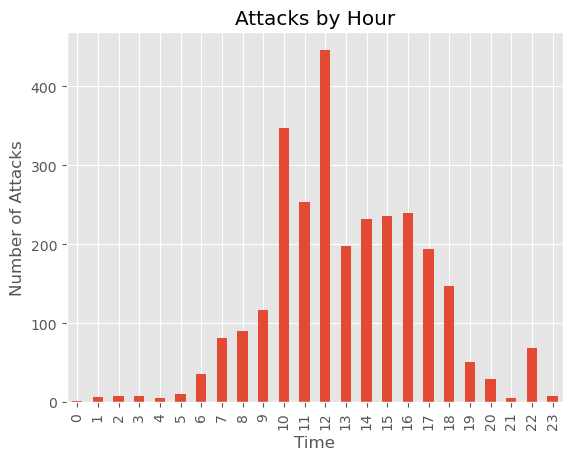

In [26]:
#Plotting to see the distribution of the attacks by hour:
sh_copy['time'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.title('Attacks by Hour')
plt.show()

<Axes: xlabel='time', ylabel='Density'>

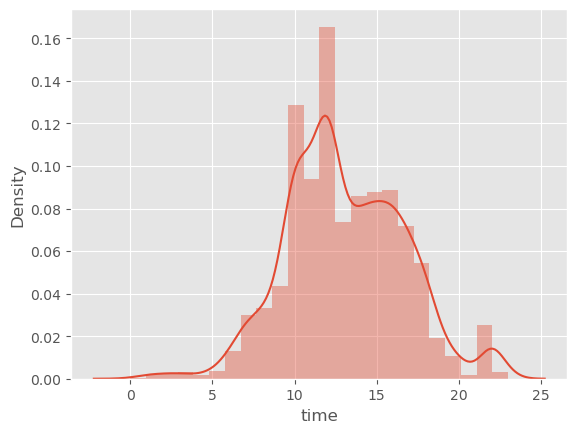

In [27]:
#Plotting in another shape, just to see which one is better
sns.distplot(sh_copy['time'], bins=24)

From what we can see from the graphs, during the morning through midday we have the most attacks, maybe because is the hour that the people is more prone to go swimming. During the night there are almost no attacks, but we can see that during 22:00, we have a peak of attacks, it may be interesting to see why.

We will continue the cleaning with the Type column

In [28]:
#Getting the unique values from the column
sh_copy['type'].unique()

array(['Boating', 'Invalid', 'Unprovoked', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster'], dtype=object)

In [29]:
#Getting the count
sh_copy['type'].value_counts()

type
Unprovoked      2355
Provoked         180
Invalid          144
Boating           59
Sea Disaster      40
Boat              32
Questionable       2
Name: count, dtype: int64

In [30]:
#Filling the nan values with the most common value
sh_copy['type'].fillna(value='Unprovoked', inplace=True)

In [31]:
#Reducing the number of categories
sh_copy['type'] = sh_copy['type'].replace({'Boatomg' : 'Boating', 'Questionable' : 'Unprovoked', 'Boat' : 'Boating', 'Invalid' : 'Unprovoked'})

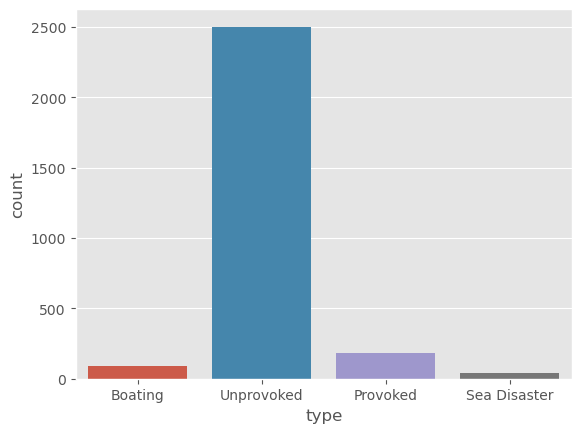

In [32]:
sns.countplot(x='type', data=sh_copy)
plt.show()

As we can see, almost all of the attacks were unprovoked.

For the next part, we will continue with the countries, as it is a ver long column, with a lot of different values.

In [33]:
#Getting all the unique values
sh_copy['country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'SOUTH AFRICA',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SAMOA', 'JAPAN', 'SPAIN',
       'ST HELENA, British overseas territory', 'REUNION',
       'UNITED ARAB EMIRATES', 'MEXICO', 'INDONESIA', 'COLUMBIA', 'EGYPT',
       'FRENCH POLYNESIA', 'Fiji', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'MOZAMBIQUE', 'THAILAND', 'PUERTO RICO', 'FRANCE',
       'PAPUA NEW GUINEA', 'ISRAEL', 'PALESTINIAN TERRITORIES', 'JAMAICA',
       'ITALY', 'ANTIGUA', 'RUSSIA', 'SEYCHELLES', 'TURKS & CAICOS',
       'FIJI', 'TONGA', 'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR', 'GUAM',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SCOTLAND',
       'UNITED KINGDOM', 'TAIWAN', 'CROATIA', 'PHILIPPINES',
       'SOLOMON ISLANDS', 'YEMEN', 'ATLANTIC OCEAN', 'ST. MAARTIN',
       'GRAND CAYMAN', 'VANUATU', 'MEXICO ', 'VENEZUELA', 'MICRONESIA',
       'OKINAWA', 'MARSHALL ISLANDS', 'EGYPT / ISRAEL', 'HONG KONG',


In [34]:
#Checking the value counts
sh_copy['country'].value_counts()

country
USA                    1328
AUSTRALIA               573
SOUTH AFRICA            333
BAHAMAS                  48
NEW ZEALAND              46
                       ... 
PERSIAN GULF              1
NORTH PACIFIC OCEAN       1
NICARAGUA                 1
AMERICAN SAMOA            1
RED SEA?                  1
Name: count, Length: 114, dtype: int64

In [35]:
#Fillin the nan values with the most common value
sh_copy['country'].fillna(value='USA', inplace=True)

In [36]:
#Dealing with duplicated values with different names and erratas
sh_copy['country'] = sh_copy['country'].replace({'Fiji' : 'FIJI',
                                                'ST HELENA, British overseas territory' : 'ST HELENA',
                                                 'UNITED ARAB EMIRATES (UAE)' : 'UNITED ARAB EMIRATES', 
                                                 'PALESTINIAN TERRITORIES' : 'PALESTINE',
                                                 'SCOTLAND' : 'UNITED KINGDOM', 
                                                 'OKINAWA' : 'JAPAN', 
                                                 'EGYPT / ISRAEL' : 'EGYPT',
                                                 'EGYPT ' : 'EGYPT', 
                                                 'FEDERATED STATES OF MICRONESIA' : 'MICRONESIA', 
                                                 'ANDAMAN / NICOBAR ISLANDAS' : 'ANDAMAN ISLANDS', 
                                                 'BRITISH WEST INDIES' : 'TURKS & CAICOS',
                                                 'ENGLAND' : 'UNITED KINGDOM',
                                                 'MEXICO ' : 'MEXICO',
                                                 'PERSIAN GULF' : 'IRAN',
                                                 'AMERICAN SAMOA' : 'SAMOA',
                                                 'JOHNSTON ISLAND' : 'USA',
                                                 'NICARAGUA ' : 'NICARAGUA',
                                                 'THE BALKANS' : 'CROATIA',
                                                 'YEMEN ' : 'YEMEN',
                                                 })

In [37]:
#Checking that everything is ok
sh_copy['country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'UNITED KINGDOM', 'SOUTH AFRICA',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SAMOA', 'JAPAN', 'SPAIN', 'ST HELENA',
       'REUNION', 'UNITED ARAB EMIRATES', 'MEXICO', 'INDONESIA',
       'COLUMBIA', 'EGYPT', 'FRENCH POLYNESIA', 'FIJI',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'MOZAMBIQUE', 'THAILAND',
       'PUERTO RICO', 'FRANCE', 'PAPUA NEW GUINEA', 'ISRAEL', 'PALESTINE',
       'JAMAICA', 'ITALY', 'ANTIGUA', 'RUSSIA', 'SEYCHELLES',
       'TURKS & CAICOS', 'TONGA', 'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR',
       'GUAM', 'PANAMA', 'TAIWAN', 'CROATIA', 'PHILIPPINES',
       'SOLOMON ISLANDS', 'YEMEN', 'ATLANTIC OCEAN', 'ST. MAARTIN',
       'GRAND CAYMAN', 'VANUATU', 'VENEZUELA', 'MICRONESIA',
       'MARSHALL ISLANDS', 'HONG KONG', 'CHILE', 'GREECE', 'GRENADA',
       'IRAQ', 'MALAYSIA', 'BERMUDA', 'SENEGAL', 'TURKEY', 'SINGAPORE',
       'NEW BRITAIN', 'PACIFIC OCEAN ', 'SOUTH PACIFIC 

In [38]:
#Dropping the few rows that have Ocean or Sea as a descriptor, as it is not exact enough to link it to a country
sh_copy = sh_copy[~sh_copy['country'].str.contains('OCEAN|SEA', case=False)]

In [39]:
#Abbrebiating the countries names so they are easier to read in a plot (really long dictionary, sorry, didn't find a better way to do it)
sh_copy['country'] = sh_copy['country'].replace({'BRAZIL' : 'BRZ',
                                                 'AUSTRALIA' : 'AUS',
                                                 'UNITED KINGDOM' : 'UK',
                                                 'SOUTH AFRICA' : 'SA',
                                                 'COSTA RICA' : 'CR',
                                                 'MALDIVES' : 'MAL',
                                                 'BAHAMAS' : 'BAH',
                                                 'NEW CALEDONIA' : 'NC',
                                                 'CUBA' : 'CUB',
                                                 'MAURITIUS' : 'MAU',
                                                 'NEW ZEALAND' : 'NZ',
                                                 'SAMOA' : 'SAM',
                                                 'JAPAN': 'JP',
                                                 'SPAIN' : 'ESP',
                                                 'ST HELENA' : 'STH',
                                                 'REUNION' : 'REU',
                                                 'UNITED ARAB EMIRATES' : 'UAE',
                                                 'MEXICO' : 'MEX',
                                                 'INDONESIA' : 'INDO',
                                                 'COLUMBIA' : 'COL',
                                                 'EGYPT' : 'EGY',
                                                 'FRENCH POLYNESIA' : 'FP',
                                                 'DOMINICAN REPUBLIC' : 'DR',
                                                 'ECUADOR' : 'ECU',
                                                 'MOZAMBIQUE' : 'MOZ',
                                                 'THAILAND' : 'THAI',
                                                 'PUERTO RICO' : 'PR',
                                                 'FRANCE' : 'FR',
                                                 'PAPUA NEW GUINEA' : 'PNG',
                                                 'ISRAEL' : 'ISR',
                                                 'PALESTINE' : 'PAL',
                                                 'JAMAICA' : 'JAM',
                                                 'ITALY' : 'IT',
                                                 'ANTIGUA' : 'ANT',
                                                 'RUSSIA' : 'RUS',
                                                 'SEYCHELLES' : 'SEY',
                                                 'TURKS & CAICOS' : 'TC',
                                                 'TONGA' : 'TONG',
                                                 'SOUTH KOREA' : 'SK',
                                                 'VIETNAM' : 'VN',
                                                 'MADAGASCAR' : 'MAD',
                                                 'GUAM' : 'GU',
                                                 'PANAMA' : 'PAN',
                                                 'TAIWAN' : 'TW',
                                                 'CROATIA' : 'CRO',
                                                 'PHILIPPINES' : 'PHI',
                                                 'SOLOMON ISLANDS' : 'SI',
                                                 'YEMEN' : 'YEM',
                                                 'ST. MAARTIN' : 'STM',
                                                 'GRAND CAYMAN' : 'GC',
                                                 'VANUATU' : 'VAN',
                                                 'VENEZUELA' : 'VEN',
                                                 'MICRONESIA' : 'MIC',
                                                 'MARSHALL ISLANDS' : 'MI',
                                                 'HONG KONG' : 'HK',
                                                 'CHILE' : 'CHI',
                                                 'GREECE' : 'GR',
                                                 'GRENADA' : 'GRE',
                                                 'IRAQ' : 'IRQ',
                                                 'MALAYSIA' : 'MAL',
                                                 'BERMUDA' : 'BER',
                                                 'SENEGAL' : 'SEN',
                                                 'TURKEY' : 'TUR',
                                                 'SINGAPORE' : 'SIN',
                                                 'NEW BRITAIN' : 'NB',
                                                 'JOHNSON ISLAND' : 'JI',
                                                 'PALAU' : 'PAL',
                                                 'TANZAIA' : 'TAN',
                                                 'NICARAGUA' : 'NIC',
                                                 'ANDAMAN ISLANDS' : 'AND',
                                                 'TANZANIA' : 'TAN',
                                                 'IRAN' : 'IRN',
                                                 'ARGENTINA' : 'ARG',
                                                 'EL SALVADOR' : 'ES',
                                                 'JAVA' : 'JAV',
                                                 'INDIA' : 'IND',
                                                 'GUYANA' : 'GUY',
                                                 'IRELAND' : 'IRL',
                                                 'MONTENEGRO' : 'MONT',
                                                 'YEMEN' : 'YEM',
                                                 'SRI LANKA' : 'SL',
                                                 'PARAGUAY' : 'PAR',
                                                 'CANADA' : 'CAN',
                                                 'TUVALU' : 'TUV',
                                                 'GUINEA' : 'GUI',
                                                 'MARTINIQUE' : 'MAR',
                                                 'BARBADOS' : 'BAR',
                                                })

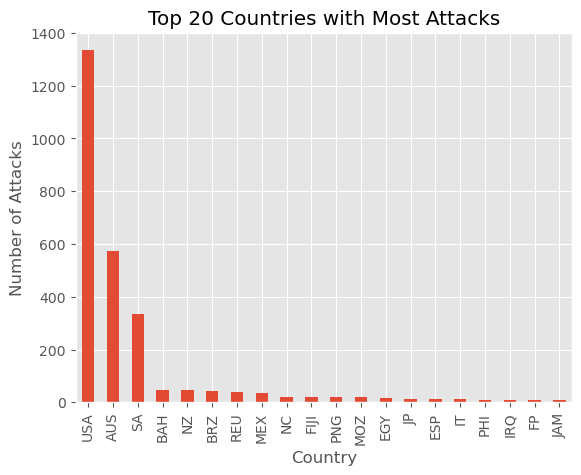

In [40]:
#Plotting the top 20 countries with most attacks
sh_copy['country'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 20 Countries with Most Attacks')
plt.show()

As we can see, USA gets the prize here by a long run, with the rest of countries only having some attacks. 

We will continue with the Sex column.

In [41]:
#Getting the value counts of the column
sh_copy['sex'].value_counts()

sex
M      2325
F       372
M         1
lli       1
Name: count, dtype: int64

In [42]:
#Filling the nan values with the most common value
sh_copy['sex'].fillna(value='M', inplace=True)

In [43]:
#Replacing the non standard values with the correct ones
sh_copy['sex'] = sh_copy['sex'].replace(['N', 'M ', 'lli', '.'], 'M')

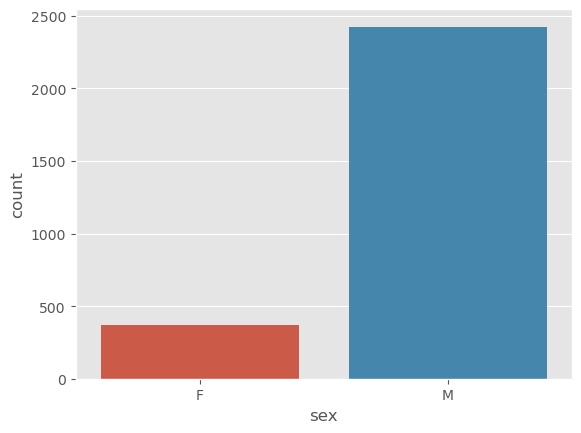

In [44]:
sns.countplot(x='sex', data=sh_copy)
plt.show()

From the data, we get that more men are attacked than women, but we don't know if it is something that the sharks take in consideration.

Next, we start working with the age.

In [45]:
#Getting the value counts of the column
sh_copy['age'].value_counts()

age
18          104
19          103
17           94
15           89
16           89
           ... 
              1
6½            1
33 or 37      1
mid-30s       1
13 or 14      1
Name: count, Length: 108, dtype: int64

In [46]:
#Getting the unique values
sh_copy['age'].unique()

array(['57', '48', '18', '15', '12', '32', '10', '21', nan, '30', '60',
       '33', '37', '19', '25', '69', '55', '34', '35', '40s', '20', '54',
       '14', '22', '31', '17', '40', '28', '42', '3', '11', '13', '50',
       '46', '82', '41', '20s', '51', '39', '58', '26', 'Teen', '47',
       '16', '61', '65', '73', '36', '66', '29', '43', '60s', '49', '59',
       '6', '27', '64', '23', '52', '24', '45', '71', '9', '44', '7',
       '62', '38', '68', '63', '70', '53', '8', 'teen', '77', '74', '56',
       '30s', '5', '86', '18 or 20', '12 or 13', '36 & 26', '8 or 10',
       '84', '\xa0 ', ' ', '6½', '33 or 37', 'mid-30s', ' 30', ' 28',
       '20?', "60's", '67', '21 or 26', '20 ', '>50', '9 & 12', '? & 19',
       '(adult)', '25 or 28', '30 & 32', '13 or 18', '33 & 26',
       'MAKE LINE GREEN', '9 or 10', '  ', '31 or 33', '13 or 14'],
      dtype=object)

In [47]:
#Starting the cleaning process, by removing the s at the end of the numbers and getting rid of the dual ages.
sh_copy['age'] = sh_copy['age'].str.split().str[0]
sh_copy['age'] = sh_copy['age'].str.split().str[0].str.replace('s','')

In [48]:
#Correcting the rest of the values
sh_copy['age'] = sh_copy['age'].replace({
                                        'Teen' : '15',
                                         'teen' : '15',
                                         '\xa0' : '18',
                                         ' ' : '18',
                                         '6½' : '6',
                                         'mid-30' : '35',
                                         '20?' : '20',
                                         "60'" : '60',
                                         '>50' : '50',
                                         '?' : '18',
                                         '(adult)' : '30',
                                         'MAKE' : '18',


})

In [49]:
#Filling the nan values with the more common value
sh_copy['age'].fillna(value='18', inplace=True)

<Axes: xlabel='age', ylabel='Density'>

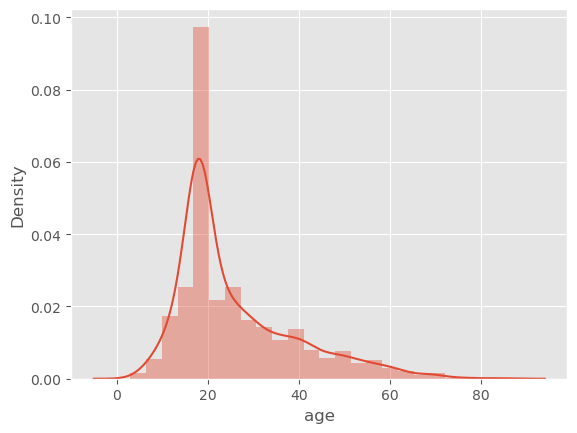

In [50]:
#Plotting to see the data
sns.distplot(sh_copy['age'], bins=24)

From the graph, we can see that the most attacks were performed on people around the age 18 to 20.

Next, we tackle the fatal column

In [51]:
#Getting the value counts of the column
sh_copy['fatal'].value_counts()

fatal
N          2192
Y           459
UNKNOWN       4
 N            3
M             1
2017          1
Name: count, dtype: int64

In [52]:
#Filling the nan values with the most common value
sh_copy['fatal'].fillna(value='N', inplace=True)

In [53]:
#Getting rid of the invalid values
sh_copy['fatal'] = sh_copy['fatal'].replace({'M' : 'N',
                                             'UNKNOWN' : 'N',
                                             ' N' : 'N',
                                             '2017' : 'N',})

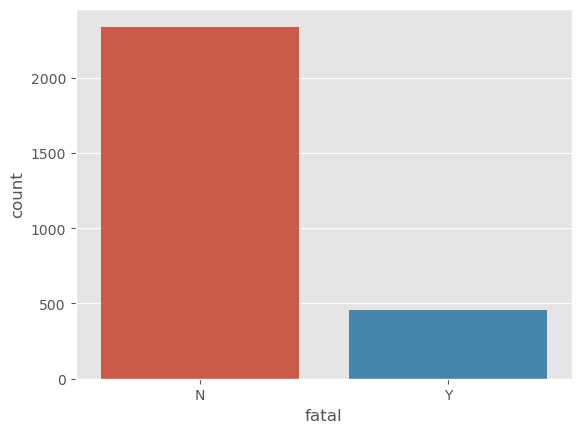

In [54]:
#Plotting the column
sns.countplot(x='fatal', data=sh_copy)
plt.show()

As we can see from the graph, most of the attacks were non fatal and the person survived it.

Next, we will tackle the year column

In [55]:
#Checking the value counts of the column
sh_copy['year'].value_counts()

year
2015.0    105
2017.0     97
2012.0     91
2016.0     89
2011.0     86
         ... 
1890.0      1
1894.0      1
1909.0      1
1918.0      1
1892.0      1
Name: count, Length: 157, dtype: int64

In [56]:
#Checking the unique values
sh_copy['year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1914., 1912., 1911., 1910., 1909.,
       1907., 1906., 1905., 1902., 1901., 1900., 1899., 1898., 1897.,
       1896., 1895., 1894., 1893., 1892., 1891., 1890., 1889., 1888.,
       1887., 1886.,

In [57]:
#Cleaning the column of the dots
sh_copy['year'] = sh_copy['year'].astype(str).str.split('.').str[0]

In [58]:
#Checking the rows with values 0
print(sh_copy['year'].value_counts()['0'])
sh_copy[sh_copy['year'] == '0']

6


,date,year,type,country,area,location,activity,sex,age,fatal,time,species
6200,Before 2009,0,Unprovoked,USA,Florida,NaN,Shark tagging,F,21,N,18,"Blacktip shark, 5'"
6241,1960s,0,Unprovoked,IRQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25,N,12,NaN
6242,1960s,0,Unprovoked,IRQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6,N,12,Bull shark
6243,1960s,0,Unprovoked,IRQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16,N,12,Bull shark
6259,1941-1945,0,Sea Disaster,USA,NaN,NaN,A group of survivors on a raft for 17-days,M,18,Y,12,1.2 m [4'] shark
6265,1941-1942,0,Unprovoked,IRQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,13,Y,12,Bull shark


In [59]:
#Correcting the values using the info from the date column
sh_copy.loc[6200, 'year'] = '2008'
sh_copy.loc[6241, 'year'] = '1960'
sh_copy.loc[6242, 'year'] = '1960'
sh_copy.loc[6243, 'year'] = '1960'
sh_copy.loc[6259, 'year'] = '1943'
sh_copy.loc[6265, 'year'] = '1942'

In [60]:
#Converting the values to datetime format
sh_copy['year'] = pd.to_datetime(sh_copy['year'], format="%Y").dt.year

<Axes: xlabel='year', ylabel='Density'>

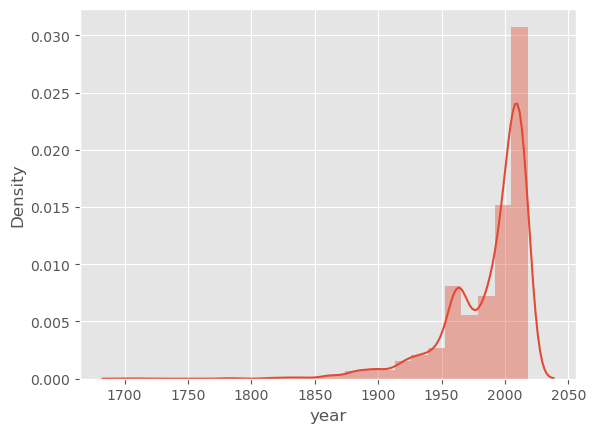

In [61]:
#Plotting the column
sns.distplot(sh_copy['year'], bins=24)

As we can see from the plot, most of the attacks were made during the 2000s and 2010s, maybe it can be linked to more data collected during the most recent years.

For the next part, we will tackle the Activity column.

In [62]:
#Getting the value counts of the column
sh_copy['activity'].value_counts()

activity
Surfing                                                          724
Swimming                                                         428
Spearfishing                                                     157
Fishing                                                          109
Wading                                                           104
                                                                ... 
Hookah diving for pen shells                                       1
Preparing to fish for jack-mackerel                                1
Fell from cliff while fishing & disappeared in strong current      1
Kneeling in the water                                              1
A group of survivors on a raft for 17-days                         1
Name: count, Length: 583, dtype: int64

In [63]:
#Getting the unique values
sh_copy['activity'].unique()

array(['Paddling', 'Surfing', 'Swimming', 'Walking', 'Standing',
       'Feeding sharks', 'Fishing', 'Scuba diving', 'Paddle-skiing',
       'Windsurfing', 'Stand-Up Paddleboarding', 'Wading',
       'Kayak fishing for sharks', nan, 'Spearfishing', 'Diving',
       'Night bathing', 'Surfing ', 'Kayaking / Fishing', 'Kayaking',
       'Snorkeling', 'Scuba Diving', 'Swimming, poaching abalone', 'SUP',
       'Skimboarding', 'Body boarding', 'Paddle boarding', 'Kakaying',
       'Grabbing shark for a selfie', 'Surf skiing ', 'Free diving',
       'Surf fishing', 'Floating', 'Surfng', 'Kite surfing',
       'Boogie boarding', 'SUP Foil boarding', 'Floating in tube',
       'Teasing a shark', 'Surf-skiing', 'Body surfing',
       'Diving for beche-de-mer', 'Kayak Fishing', 'Swimming / Wading',
       'Photographing fish', 'Scallop diving on hookah', 'Body boarding ',
       'Playing in the water', 'Body Boarding', 'Body surfing?',
       'Playing', 'Standing / Snorkeling', 'Hand feeding sha

In [64]:
#Creating a dictionary to replace the values (again, sorry for the long dictionary)
rule_replace = {'(?i).*Swimming.*' : 'Swimming',
                '(?i).*swim.*' : 'Swimming',
                '(?i).*Fishing.*' : 'Fishing',
                '(?i).*fish.*' : 'Fishing',
                '(?i).*Surfing.*' : 'Surfing',
                '(?i).*Bathing.*' : 'Swimming',
                '(?i).*Diving.*' : 'Diving',
                '(?i).*Standing.*' : 'Standing',
                '(?i).*Snorkeling.*' : 'Diving',
                '(?i).*Wading.*' : 'Wading',
                '(?i).*Scuba.*' : 'Diving',
                '(?i).*Body.*' : 'Surfing',
                '(?i).*Kayaking.*' : 'Kayaking',
                '(?i).*Windsurfing.*' : 'Surfing',
                '(?i).*Paddle.*' : 'Surfing',
                '(?i).*Floating.*' : 'Swimming',
                '(?i).*Rowing.*' : 'Sailing',
                '(?i).*Canoeing.*' : 'Sailing',
                '(?i).*Boogie.*' : 'Surfing',
                '(?i).*Sailing.*' : 'Sailing',
                '(?i).*Fell.*' : 'Swimming',
                '(?i).*Walking.*' : 'Walking',
                '(?i).*Boating.*' : 'Sailing',
                '(?i).*surf.*' : 'Surfing',
                '(?i).*SUP.*' : 'Surfing',
                '(?i).*Fell.*' : 'Swimming',
                '(?i).*Freediving.*' : 'Diving',
                '(?i).*boardin.*' : 'Surfing',
                '(?i).*snorkeling.*' : 'Diving',
                '(?i).*cast.*' : 'Fishing',
                '(?i).*cleaning.*' : 'Fishing',
                '(?i).*disaster.*' : 'Swimming',
                '(?i).*ski.*' : 'Surfing',
                '(?i).*shark.*' : 'Messing with Sharks',
                '(?i).*water.*' : 'Swimming',
                '(?i).*playing.*' : 'Playing',
                '(?i).*dive.*' : 'Diving',
                '(?i).*float.*' : 'Swimming',
                '(?i).*clean.*' : 'Shore Activity',
                '(?i).*spear.*' : 'Fishing',
                '(?i).*sink.*' : 'Swimming',
                '(?i).*sank.*' : 'Swimming',
                '(?i).*sunk.*' : 'Swimming',
                '(?i).*wreck.*' : 'Swimming',
                '(?i).*crash.*' : 'Swimming',
                '(?i).*aircraft.*' : 'Swimming',
                '(?i).*waves.*' : 'Shore Activity',
                '(?i).*sea.*' : 'Swimming',
                '(?i).*raft.*' : 'Swimming',
                '(?i).*towing.*' : 'Swimming',
                '(?i).*air.*' : 'Swimming',
                '(?i).*wash.*' : 'Shore Activity',
                '(?i).*collect.*' : 'Fishing',
                '(?i).*boat.*' : 'Sailing',
                '(?i)Pulling.*' : 'Fishing',
                '(?i).*net.*' : 'Fishing',
                '(?i).*Beach.*' : 'Shore Activity',
                '(?i).*founder.*' : 'Sailing',
                '(?i).*hunt.*' : 'Fishing',
                '(?i).*overboard.*' : 'Swimming',
                '(?i).*ship.*' : 'Sailing',
                '(?i).*river.*' : 'Swimming',
                'pêcheur de bichiques' : 'Fishing',
                'Kakaying' : 'Kayaking',
                '(?i).*cross.*' : 'Swimming',
                '(?i).*swell.*' : 'Swimming',
                'Splashing' : 'Shore Activity',
                '(?i).*reach.*' : 'Swimming',
                '(?i).*submarine.*' : 'Swimming',
                }

In [65]:
#Apllying the dictionary to the column
sh_copy['activity'] = sh_copy['activity'].replace(rule_replace, regex=True)

In [66]:
#Getting the new uniques to check if everything is ok
sh_copy['activity'].unique()

array(['Paddling', 'Surfing', 'Swimming', 'Walking', 'Standing',
       'Messing with Sharks', 'Fishing', 'Diving', 'Wading', nan,
       'Kayaking', 'Playing', 'Sailing', 'Shore Activity', 'Rescuing',
       'Paddling on kneeboard', 'Crawling', 'Crabbing', 'Jumping',
       'Murder', 'Shrimping', 'Lifesaving drill', 'Sitting in shallows',
       'Clamming', 'Escaping from Alacatraz', 'Shore Activity ',
       'Lifesaving exhibition'], dtype=object)

In [67]:
#Getting the new value counts
sh_copy['activity'].value_counts()

activity
Surfing                    1001
Swimming                    722
Fishing                     430
Diving                      241
Wading                      114
Standing                     84
Messing with Sharks          32
Kayaking                     28
Sailing                      23
Walking                      19
Shore Activity                8
Playing                       7
Lifesaving drill              4
Jumping                       3
Clamming                      2
Paddling                      2
Escaping from Alacatraz       2
Shore Activity                2
Sitting in shallows           1
Rescuing                      1
Shrimping                     1
Murder                        1
Crabbing                      1
Crawling                      1
Paddling on kneeboard         1
Lifesaving exhibition         1
Name: count, dtype: int64

In [68]:
#Filling the nan values with the most common value
sh_copy['activity'].fillna(value='Surfing', inplace=True)

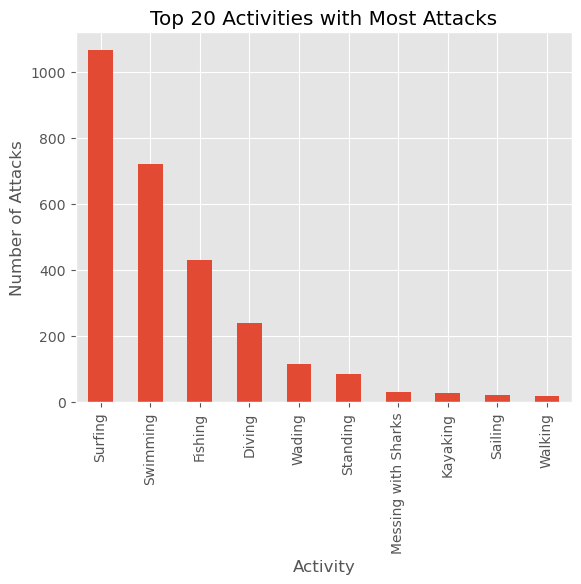

In [69]:
#Plotting the top 10 activities with most attacks
sh_copy['activity'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 20 Activities with Most Attacks')
plt.style.use('seaborn-deep')
plt.show()

From the plot, we can see that the two most common activities that suffer attacks are surfing and swimming, followed by fishing. Something easy to understand as it represents being in the water and moving the way that the sharks seem to relationate to easy prey.